In [30]:
# standard libraries to import
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [31]:
# import training data
data = pd.read_csv('data/train.csv')

In [32]:
# each row is a training example, i.e. each row is an image
data.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [33]:
# convert data to numpy array
data = np.array(data)
data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]])

In [34]:
# row, column (column is +1 cause of label column)
m, n = data.shape
m,n

(42000, 785)

In [35]:
# shuffle the elements, in-place
# essentially,k shuffles the order of images, since an element (a list) is an image
np.random.shuffle(data)
data

array([[4, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
# validation set: transforming to make each training example a column
data_dev = data[0:1000].T
# since first row is labels now, this works cause of the transform
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
# normalize values, this is an important step, but why? 
# it's probably because the weights are so small, they work better with smaller values, maybe
# also easier to process smaller values
X_dev = X_dev / 255

# training data
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255

In [37]:
Y_train # our labels

array([5, 6, 8, ..., 4, 3, 0])

In [38]:
X_train # our image data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
X_train[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [40]:
X_train[0].shape # this is the first row, cause there are 42k samples in total

(41000,)

In [41]:
# gives rows, cols. Makes sense, cause each column is an example
# so # of rows will be # of pixels in an image essentially
X_train[:].shape 

(784, 41000)

In [42]:
X_train[:,0].shape # this is the first column, essentially first element of each list

(784,)

In [43]:
# randn: mean = 0, variance = 1, normal distribution
# rand: uniform distribution over [0,1)]
np.random.rand()

0.18145974149916133

In [44]:
# weights and biases for the hidden and output layer
def init_params():
    W1 = np.random.rand(10, 784) - 0.5 # why 0.5? cause weights can be negative as well
    B1 = np.random.rand(10, 1) - 0.5
    
    W2 = np.random.rand(10, 10) - 0.5
    B2 = np.random.rand(10, 1) - 0.5
    
    return W1, B1, W2, B2

# essentially linear after 0, prior to 0, outputs 0
def ReLU(Z):
    return np.maximum(Z, 0) # element wise

# need clarification here...
def softmax(Z):
    # np.sum() preserves each column, collapses the rows
    # we still want to preserve each column
    # np.exp(Z) is element wise
    # so we are dividing each element with the sum of elements in that same column
    A = np.exp(Z) / sum(np.exp(Z)) # not np.sum()?
    
    return A

# encoding labels into a vector format
def one_hot(Y):
    # creating empty matrix of sampleSize, # of classes
    one_hot_Y = np.zeros((Y.size, Y.max()+1))
    # based on the label value, fill that element in each array to be 1
    one_hot_Y[np.arange(Y.size), Y] = 1
    # to get each column to be an example
    one_hot_Y = one_hot_Y.T
    
    return one_hot_Y
    
def forward_prop(W1, B1, W2, B2, X):
    Z1 = W1.dot(X) + B1
    A1 = ReLU(Z1)
    
    Z2 = W2.dot(A1) + B2
    A2 = softmax(Z2)
    
    return Z1, A1, Z2, A2

# derivative past 0 is 1, cause y=x, prior to 0, it's 0. So this returns 1 or 0
def deriv_ReLU(Z):
    return Z > 0

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    # m = # of examples
    m = Y.size
    one_hot_Y = one_hot(Y)
    
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    dB2 = 1/m * np.sum(dZ2)
    
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    dB1 = 1/m * np.sum(dZ1) 
    
    return dW1, dB1, dW2, dB2

# optimizer, based on alpha (learning rate)
def update_params(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha):
    W1 = W1 - alpha * dW1
    B1 = B1 - alpha * dB1
    W2 = W2 - alpha * dW2
    B2 = B1 - alpha * dB2
    
    return W1, B1, W2, B2

In [45]:
# cause A2 is the output of output layer, in probabilities 
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    # essentially when prediciton matches Y, sum those, vs. total Y size
    return np.sum(predictions == Y) / Y.size 

def gradient_descent(X, Y, iterations, alpha):
    W1, B1, W2, B2 = init_params()
    
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, B1, W2, B2, X)
        dW1, dB1, dW2, dB2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, B1, W2, B2 = update_params(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha)
        
        if i % 50 == 0:
            print('Iteration: ', i)
            print('Accuracy: ', get_accuracy(get_predictions(A2), Y))
            
    return W1, B1, W2, B2

In [46]:
W1, B1, W2, B2 = gradient_descent(X_train, Y_train, 1000, 0.2)

Iteration:  0
[6 6 6 ... 6 5 6] [5 6 8 ... 4 3 0]
Accuracy:  0.10680487804878049
Iteration:  50
[6 2 8 ... 4 3 3] [5 6 8 ... 4 3 0]
Accuracy:  0.6119024390243902
Iteration:  100
[8 6 8 ... 4 3 8] [5 6 8 ... 4 3 0]
Accuracy:  0.7430487804878049
Iteration:  150
[8 6 8 ... 4 3 8] [5 6 8 ... 4 3 0]
Accuracy:  0.7925853658536586
Iteration:  200
[8 6 8 ... 4 5 8] [5 6 8 ... 4 3 0]
Accuracy:  0.8173414634146341
Iteration:  250
[8 6 8 ... 4 5 0] [5 6 8 ... 4 3 0]
Accuracy:  0.8348780487804878
Iteration:  300
[8 6 8 ... 4 5 0] [5 6 8 ... 4 3 0]
Accuracy:  0.8457073170731707
Iteration:  350
[8 6 8 ... 4 5 0] [5 6 8 ... 4 3 0]
Accuracy:  0.8535365853658536
Iteration:  400
[8 6 8 ... 4 5 0] [5 6 8 ... 4 3 0]
Accuracy:  0.8611707317073171
Iteration:  450
[8 6 8 ... 4 5 0] [5 6 8 ... 4 3 0]
Accuracy:  0.8670243902439024
Iteration:  500
[8 6 8 ... 4 5 0] [5 6 8 ... 4 3 0]
Accuracy:  0.8715853658536585
Iteration:  550
[8 6 8 ... 4 5 0] [5 6 8 ... 4 3 0]
Accuracy:  0.875219512195122
Iteration:  600
[5 

In [47]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


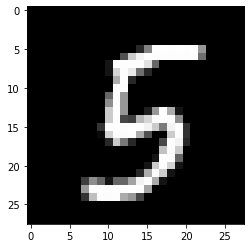

Prediction:  [6]
Label:  6


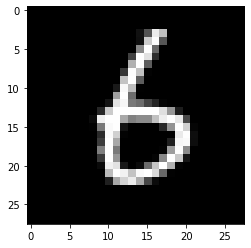

Prediction:  [8]
Label:  8


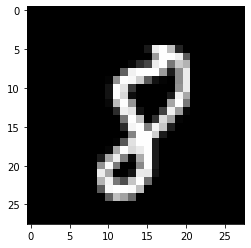

Prediction:  [8]
Label:  8


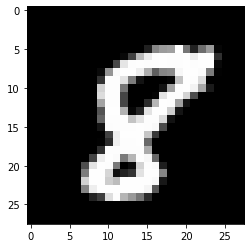

In [48]:
test_prediction(0, W1, B1, W2, B2)
test_prediction(1, W1, B1, W2, B2)
test_prediction(2, W1, B1, W2, B2)
test_prediction(3, W1, B1, W2, B2)